In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#leer todos los archivos de 'train'
array_df = [pd.read_csv('Data/train/data_0'+ str(csvnum) +'.csv') for csvnum in np.arange(1,15+1)]

In [3]:
#quitar la fecha
array_df_wodate = [df.drop('date', axis=1) for df in array_df]

In [4]:
#longitud de los archivos
array_len_df_wodate = [len(df) for df in array_df_wodate]
array_len_df_wodate

[366, 366, 366, 366, 366, 366, 366, 366, 366, 366, 366, 366, 366, 366, 366]

In [5]:
#cambiar el indice del dataframe
for csvnum in np.arange(1,15+1): 
    array_df_wodate[csvnum-1].set_axis(np.arange(sum(array_len_df_wodate[:csvnum-1]), sum(array_len_df_wodate[:csvnum])), axis='index', inplace=True)    

In [6]:
#dataframe con todos los archivos de entrenamiento
df_conc = pd.concat(array_df_wodate)
df_conc

T_AMB     P_AMB    CMP_SPEED       CDP      GGDP       HPT_IT  \
0      1.450440  0.843522     0.000000  0.843522  0.843522          NaN   
1      2.761142  0.843856  7870.729713  7.907587  2.448490   949.263690   
2      9.270325  0.843413  9898.625866  9.407523  2.816769   984.601577   
3     14.293265  0.844249  9850.791469  9.121784  2.775070  1014.536922   
4     12.875213  0.843663  9828.508458  9.138088  2.776577  1008.503746   
...         ...       ...          ...       ...       ...          ...   
5485  23.966081  1.006864  2395.345158  2.583554  1.472390  1308.431243   
5486  28.826326  1.006450     0.000000  1.006450  1.006450          NaN   
5487  31.811188  1.005989     0.000000  1.005989  1.005989          NaN   
5488  30.411757  1.006530     0.000000  1.006530  1.006530          NaN   
5489  27.895041  1.005540     0.000000  1.005540  1.005540          NaN   

             CDT       LPT_IT       EXH_T         RH       WAR         POWER  
0       1.450440          NaN         NaN  81.237441  0.000041           NaN  
1     258.933367   625.677722  387.749872  74.311313  0.000041  13332.692409  
2     338.014765   655.857137  413.039467  47.897182  0.000041  13026.684965  
3     347.129100   681.701087  434.895488  34.400729  0.000041  12773.507042  
4     344.360211   677.018748  431.268990  37.537882  0.000041  12768.092781  
...          ...          ...         ...        ...       ...           ...  
5485  125.313095  1004.390201  758.797958  82.355324  0.000151   8724.585852  
5486   28.826326          NaN         NaN  62.004601  0.000151           NaN  
5487   31.811188          NaN         NaN  51.717477  0.000151           NaN  
5488   30.411757          NaN         NaN  56.456168  0.000151           NaN  
5489   27.895041          NaN         NaN  64.920297  0.000151           NaN  

[5490 rows x 12 columns]

In [7]:
#quitar los valores sin predicciones

df_conc['POWER'].index[(df_conc['POWER'].isnull() == False)]
df_conc = df_conc.iloc[df_conc['POWER'].index[(df_conc['POWER'].isnull() == False)]]
df_conc

T_AMB     P_AMB    CMP_SPEED       CDP      GGDP       HPT_IT  \
1      2.761142  0.843856  7870.729713  7.907587  2.448490   949.263690   
2      9.270325  0.843413  9898.625866  9.407523  2.816769   984.601577   
3     14.293265  0.844249  9850.791469  9.121784  2.775070  1014.536922   
4     12.875213  0.843663  9828.508458  9.138088  2.776577  1008.503746   
5      6.428793  0.843476  9811.063997  9.382896  2.813157   974.266493   
...         ...       ...          ...       ...       ...          ...   
5481  31.883929  1.006451  7045.558404  5.356065  2.321759  1376.011249   
5482  30.508063  1.006151  7080.441132  5.426848  2.336701  1364.689447   
5483  25.792044  1.006377  7073.522453  5.521194  2.357187  1334.805924   
5484  22.426525  1.006667  7086.659944  5.611850  2.376802  1312.518658   
5485  23.966081  1.006864  2395.345158  2.583554  1.472390  1308.431243   

             CDT       LPT_IT       EXH_T         RH       WAR         POWER  
1     258.933367   625.677722  387.749872  74.311313  0.000041  13332.692409  
2     338.014765   655.857137  413.039467  47.897182  0.000041  13026.684965  
3     347.129100   681.701087  434.895488  34.400729  0.000041  12773.507042  
4     344.360211   677.018748  431.268990  37.537882  0.000041  12768.092781  
5     332.160004   648.535282  407.862674  58.302392  0.000041  12945.087056  
...          ...          ...         ...        ...       ...           ...  
5481  338.002660  1069.892519  820.596377  51.861424  0.000152   8156.135192  
5482  336.736602  1058.460908  809.488886  56.283510  0.000152   8269.357104  
5483  329.118101  1031.479866  785.374250  74.343771  0.000152   8377.100553  
5484  323.945096  1011.000087  766.816724  90.707029  0.000152   8496.143706  
5485  125.313095  1004.390201  758.797958  82.355324  0.000151   8724.585852  

[4337 rows x 12 columns]

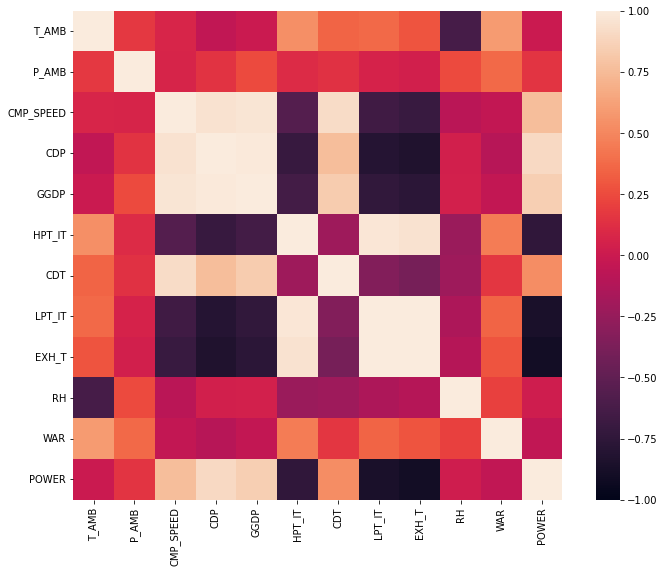

In [8]:
#Matriz de correlaciones entre variables
corrmat = df_conc.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True);

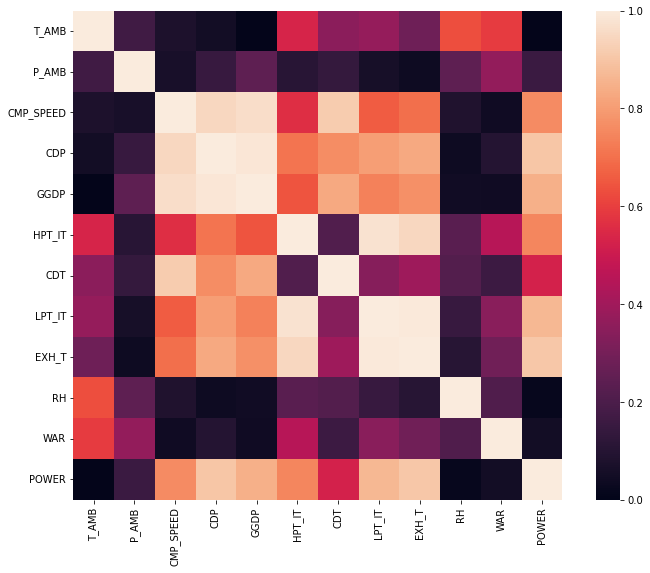

In [9]:
#Valor absoluto de matriz de correlaciones
corrmat = df_conc.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(abs(corrmat), vmin=0, vmax=1, square=True);

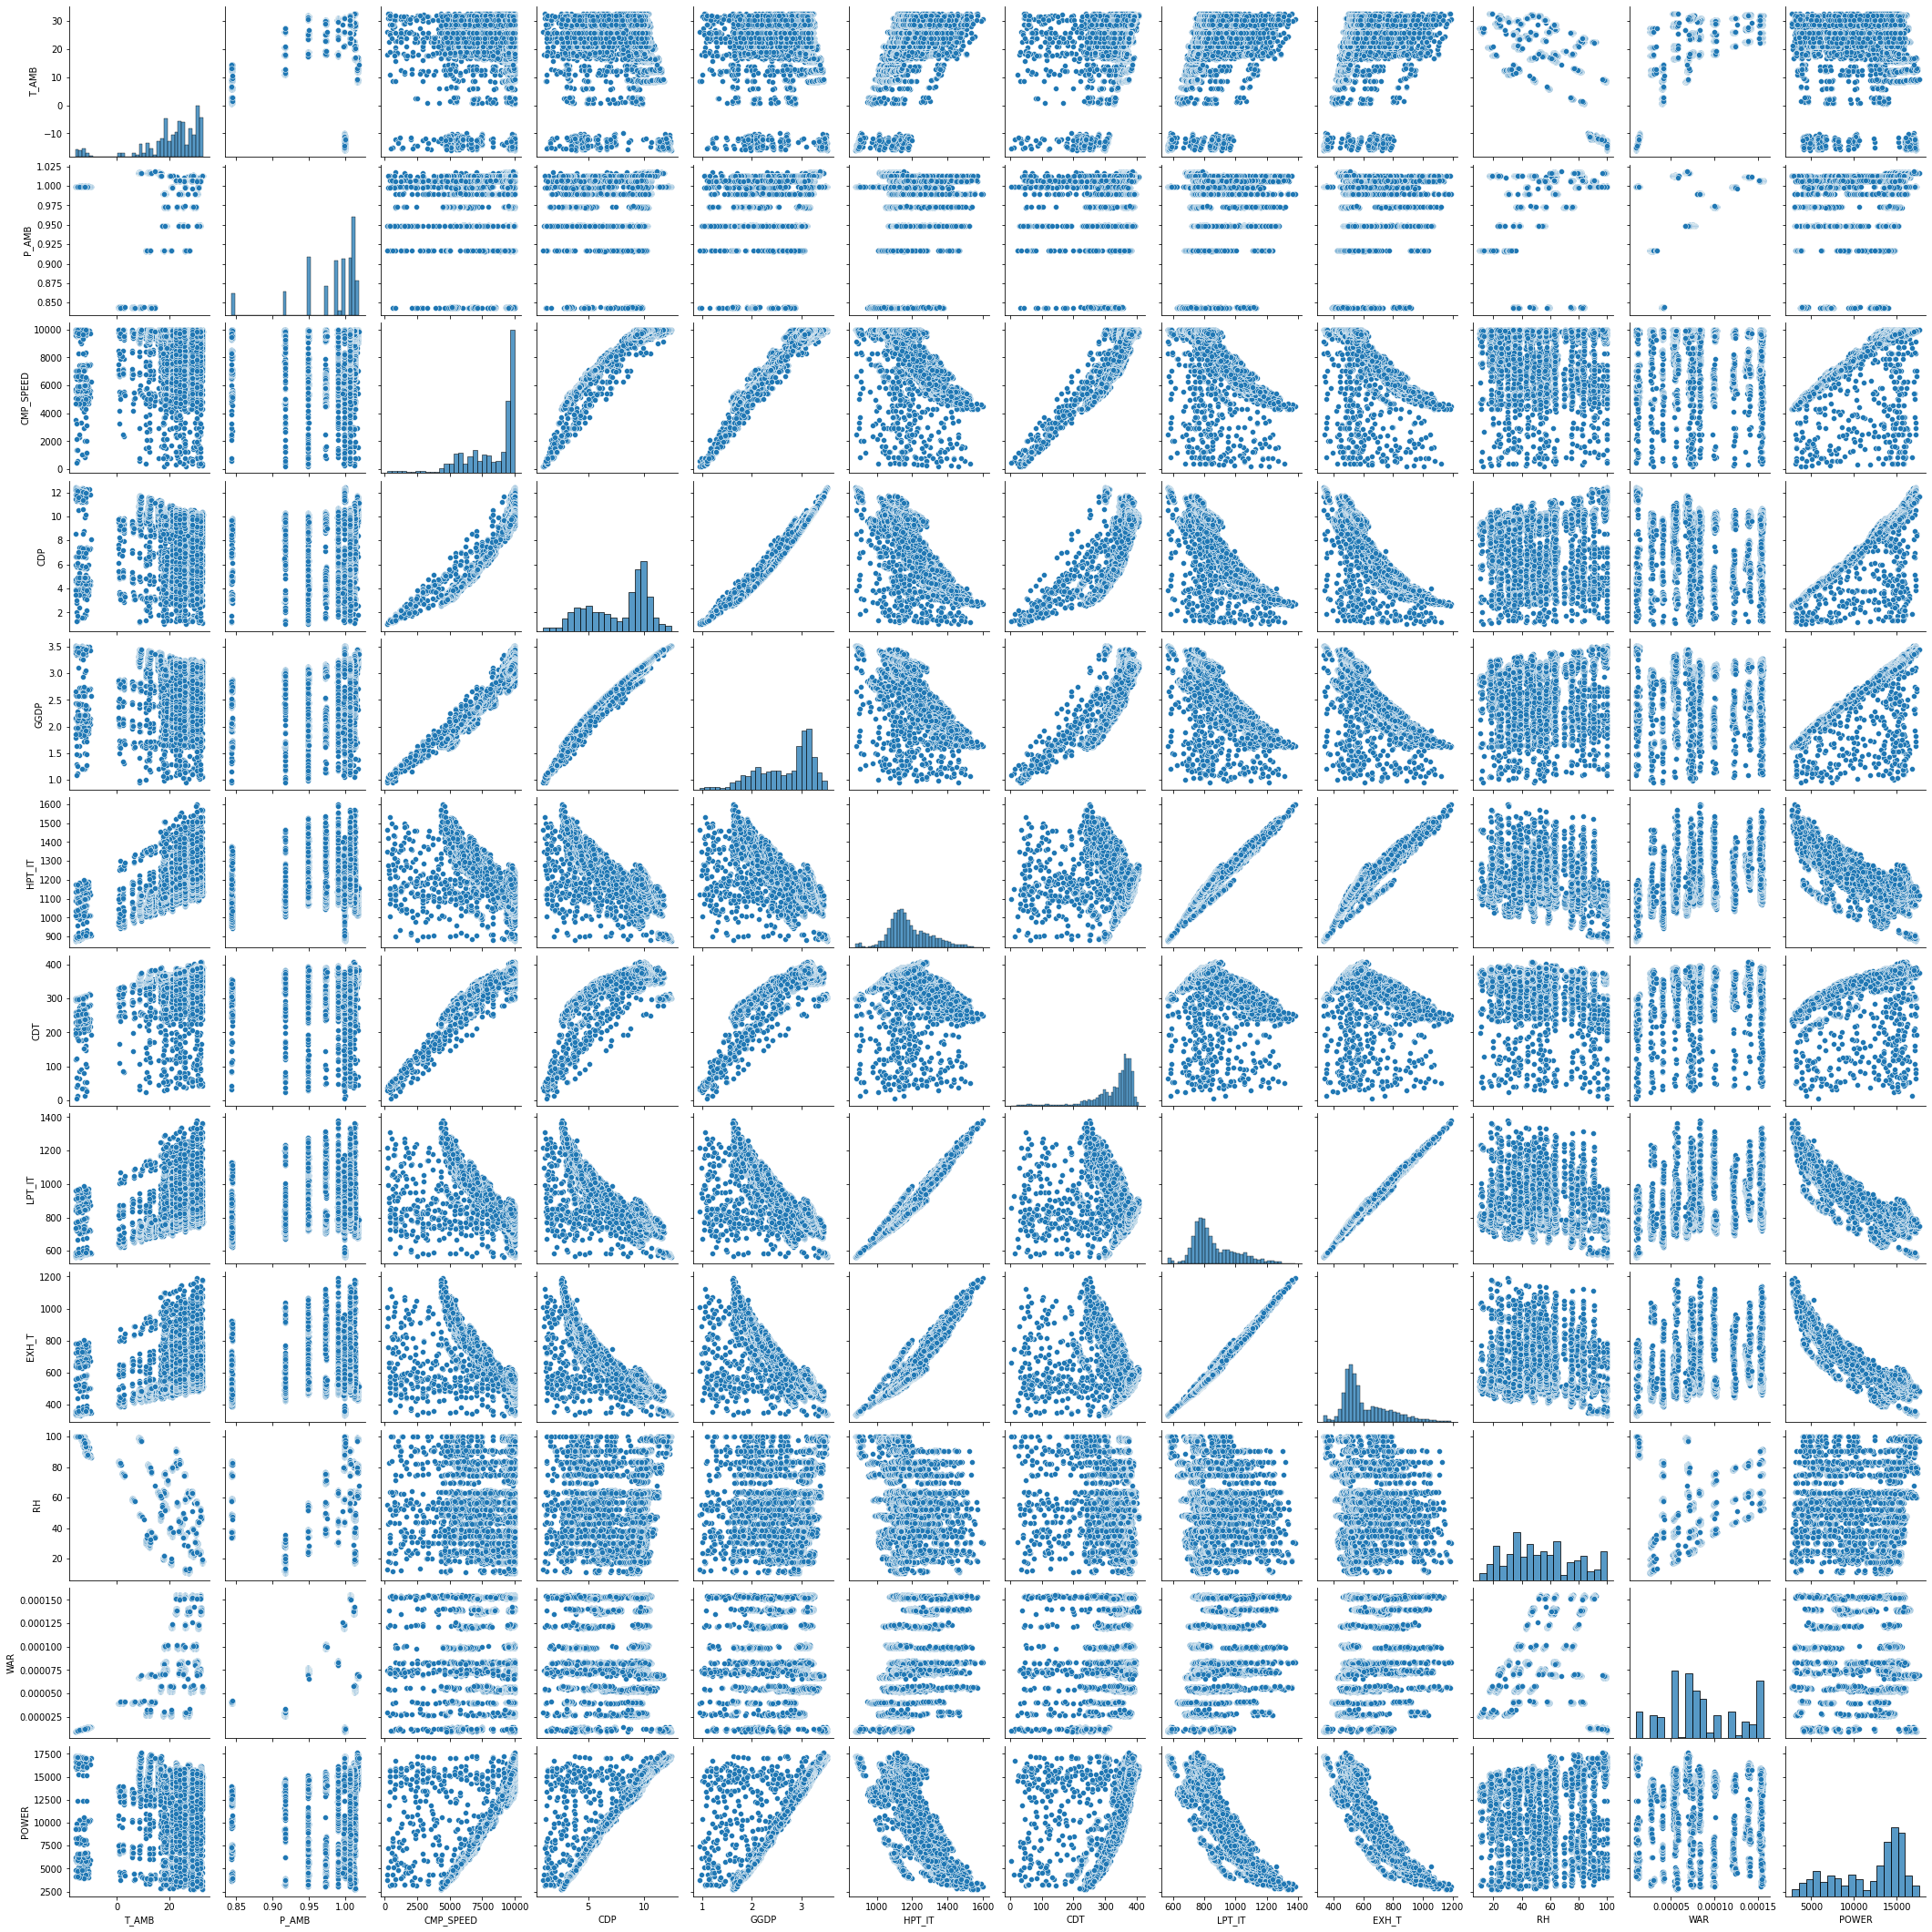

In [10]:
#pair plot to find the dependence between variables (most specifically the POWER dependence)
sns.pairplot(df_conc)

In [11]:
#Buscamos que variables tienen mayor correlacion con Power
abs(corrmat['POWER']).sort_values(ascending=False)

POWER        1.000000
EXH_T        0.903272
CDP          0.898743
LPT_IT       0.863357
GGDP         0.846911
CMP_SPEED    0.758151
HPT_IT       0.746706
CDT          0.525526
P_AMB        0.155483
WAR          0.049835
RH           0.017927
T_AMB        0.004338
Name: POWER, dtype: float64

Text(0, 0.5, 'power (kW)')

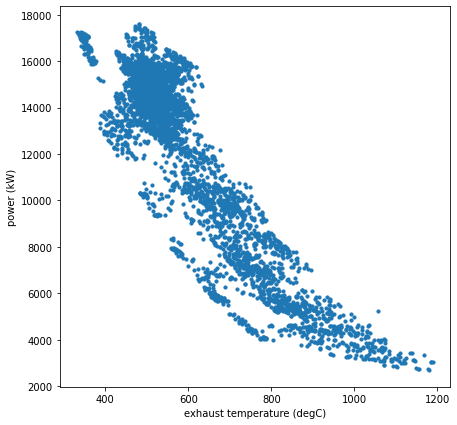

In [12]:
#Visualizamos el primer resultado EXH_T
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['EXH_T'], df_conc['POWER'], s =10)
plt.xlabel("exhaust temperature (degC)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

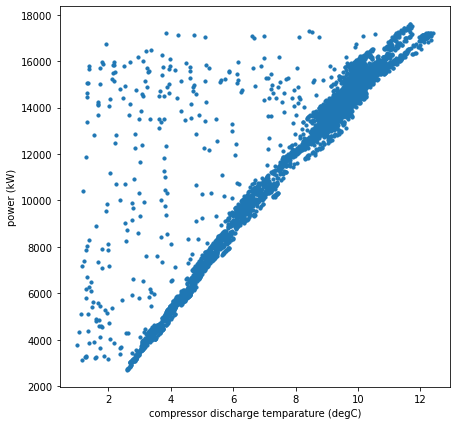

In [13]:
#Visualizamos el segundo resultado CDP
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['CDP'], df_conc['POWER'], s =10)
plt.xlabel("compressor discharge temparature (degC)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

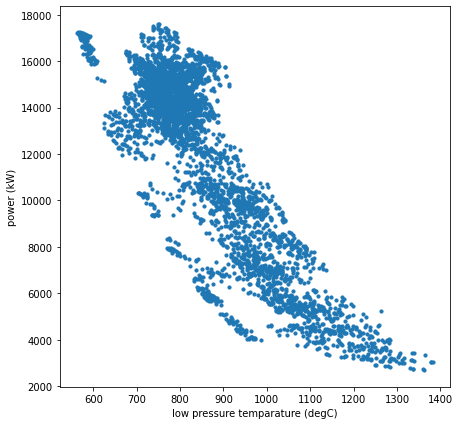

In [14]:
#Visualizamos el tercer resultado LPT_IT
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['LPT_IT'], df_conc['POWER'], s =10)
plt.xlabel("low pressure temparature (degC)")
plt.ylabel("power (kW)")
#plt.scatter(df_conc['LPT_IT'], df_conc['POWER'])

Text(0, 0.5, 'power (kW)')

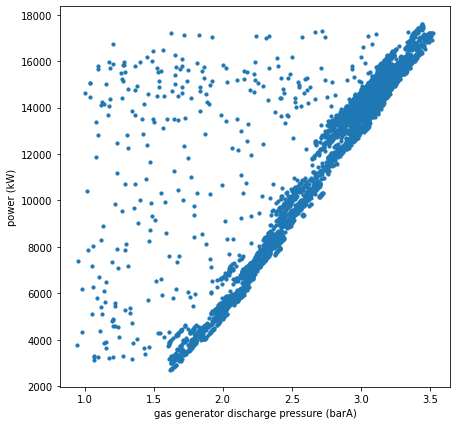

In [15]:
#Visualizamos el cuarto resultado LPT_IT
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['GGDP'], df_conc['POWER'], s =10)
plt.xlabel("gas generator discharge pressure (barA)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

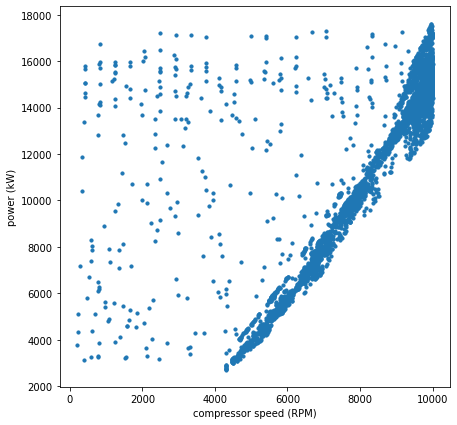

In [16]:
#Visualizamos el quinto resultado CMP_SPEED
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['CMP_SPEED'], df_conc['POWER'], s =10)
plt.xlabel("compressor speed (RPM)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

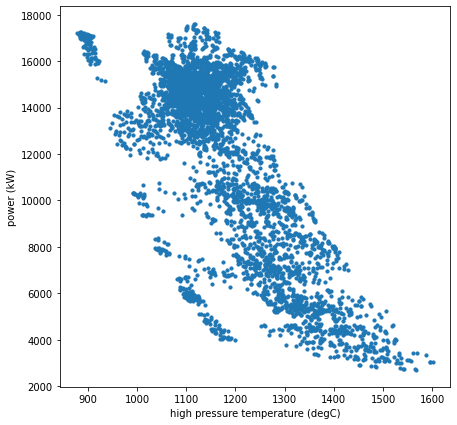

In [17]:
#Visualizamos el sexto resultado HPT_IT
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['HPT_IT'], df_conc['POWER'], s =10)
plt.xlabel("high pressure temperature (degC)")
plt.ylabel("power (kW)")

# Quiza los datos se entiendan mejor si segmentamos los datos por el archivo que provienen

In [18]:
#vector of colors
df_color = np.vectorize(lambda x: int((x)/366)*100/(15))(df_conc.index)

Text(0, 0.5, 'power (kW)')

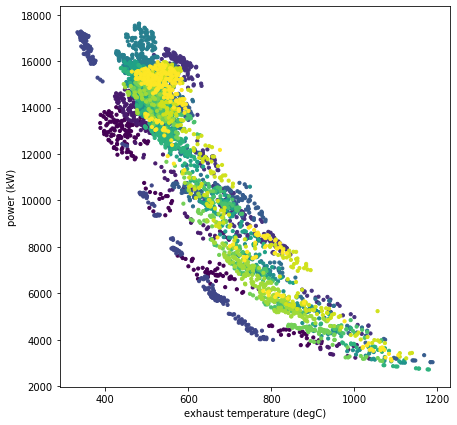

In [19]:
#Visualizamos el primer resultado EXH_T
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['EXH_T'], df_conc['POWER'], s =10, c= df_color)
plt.xlabel("exhaust temperature (degC)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

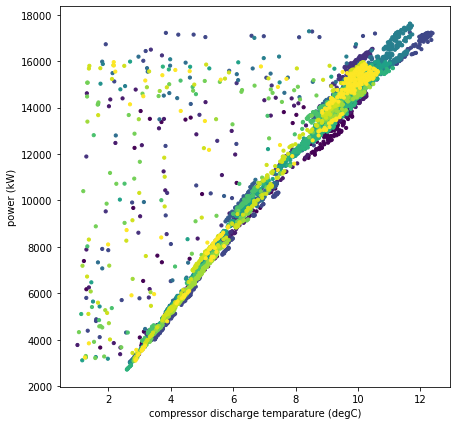

In [20]:
#Visualizamos el segundo resultado CDP
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['CDP'], df_conc['POWER'], s =10, c= df_color)
plt.xlabel("compressor discharge temparature (degC)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

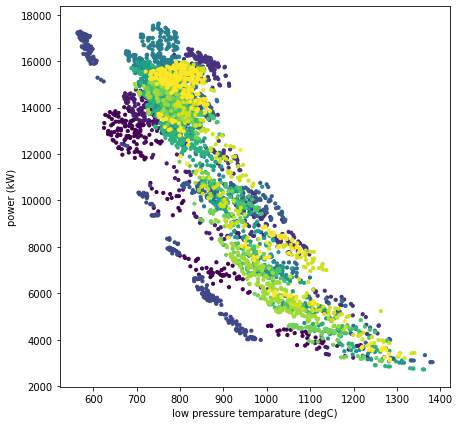

In [21]:
#Visualizamos el tercer resultado LPT_IT
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['LPT_IT'], df_conc['POWER'], s =10, c= df_color)
plt.xlabel("low pressure temparature (degC)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

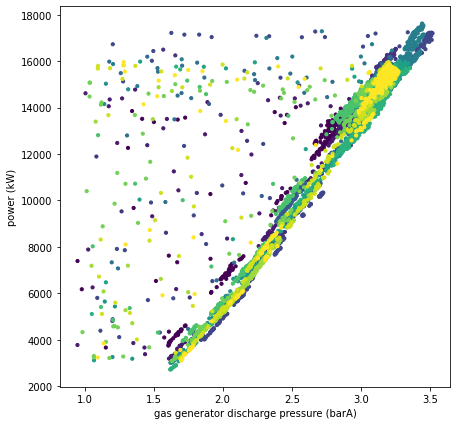

In [22]:
#Visualizamos el cuarto resultado GGDP
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['GGDP'], df_conc['POWER'], s =10, c= df_color)
plt.xlabel("gas generator discharge pressure (barA)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

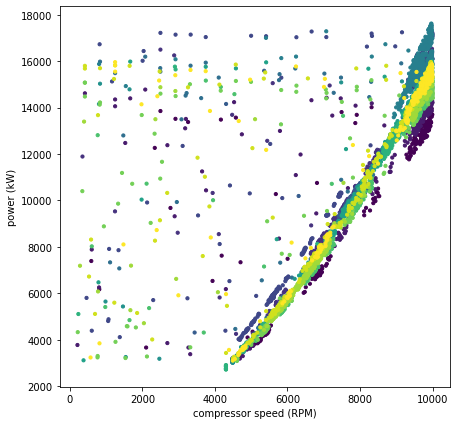

In [23]:
#Visualizamos el quinto resultado CMP_SPEED
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['CMP_SPEED'], df_conc['POWER'], s =10, c= df_color)
plt.xlabel("compressor speed (RPM)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

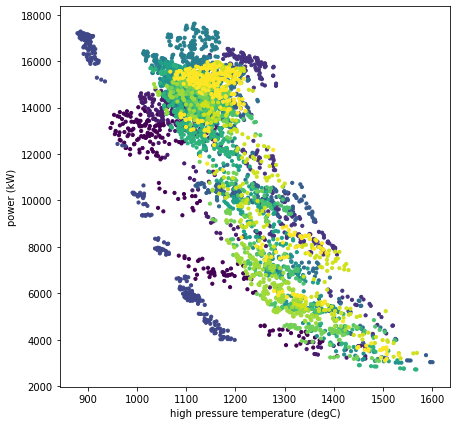

In [24]:
#Visualizamos el sexto resultado HPT_IT
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['HPT_IT'], df_conc['POWER'], s =10, c= df_color)
plt.xlabel("high pressure temperature (degC)")
plt.ylabel("power (kW)")

# El valor de CDP parece un resultado prometedor como estimador debido a su baja varianza

Text(0, 0.5, 'power (kW)')

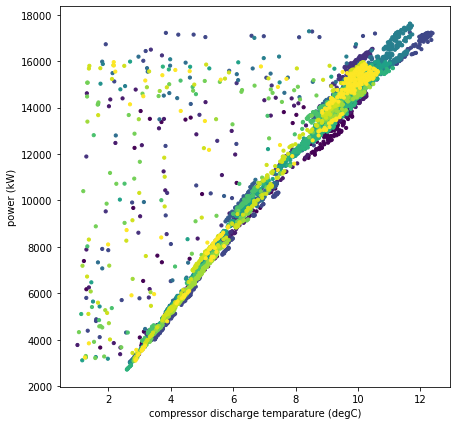

In [25]:
#Visualizamos el segundo resultado CDP
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df_conc['CDP'], df_conc['POWER'], s =10, c= df_color)
plt.xlabel("compressor discharge temparature (degC)")
plt.ylabel("power (kW)")

# Sin embargo presenta varios 'outliers', que podemos quitar con un corte lineal

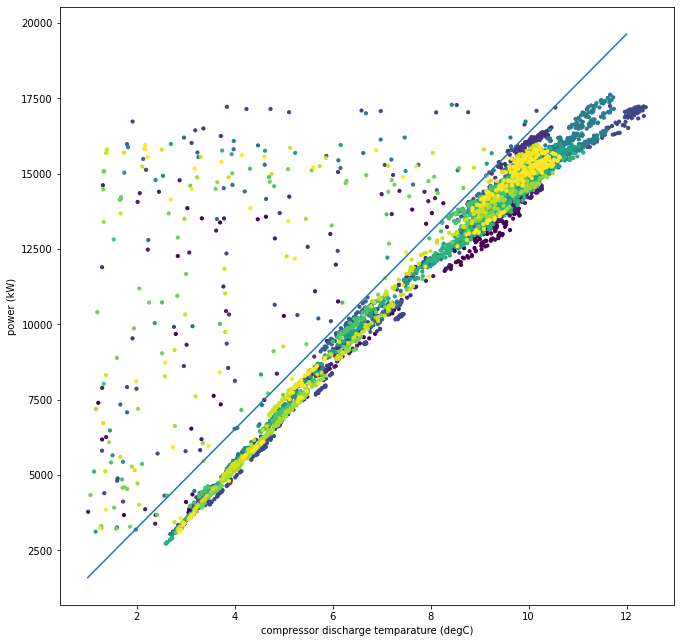

In [26]:
reg_coef_ = 1500 + 140
reg_intercept_ = -1000 + 950

f, ax = plt.subplots(figsize=(11, 11))
plt.scatter(df_conc['CDP'], df_conc['POWER'], s =10, c=df_color)
plt.plot(np.linspace(1,12, 51), (reg_coef_) *np.linspace(1,12, 51) + (reg_intercept_))
plt.xlabel("compressor discharge temparature (degC)")
plt.ylabel("power (kW)")
plt.show()

# Podemos hacer una seleccion de estos 'outliers'

In [27]:
oranges_example = df_conc['POWER'] > (reg_coef_) *df_conc['CDP'] + (reg_intercept_)
blue_example = df_conc['POWER'] <= (reg_coef_) *df_conc['CDP'] + (reg_intercept_)

In [28]:
np.logical_not(oranges_example)

1       False
2        True
3        True
4        True
5        True
        ...  
5481     True
5482     True
5483     True
5484     True
5485    False
Length: 4337, dtype: bool

Text(0, 0.5, 'power (kW)')

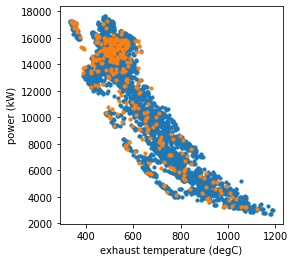

In [29]:
#Visualizamos el primer resultado EXH_T
f, ax = plt.subplots(figsize=(4, 4))
plt.scatter(df_conc['EXH_T'][blue_example], df_conc['POWER'][blue_example], s =10, color = plt.get_cmap("tab10")(0))
plt.scatter(df_conc['EXH_T'][oranges_example], df_conc['POWER'][oranges_example], s =10,  color = plt.get_cmap("tab10")(1))
plt.xlabel("exhaust temperature (degC)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

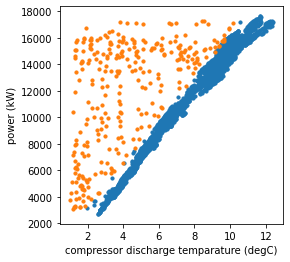

In [30]:
#Visualizamos el segundo resultado CDP
f, ax = plt.subplots(figsize=(4, 4))
plt.scatter(df_conc['CDP'][blue_example], df_conc['POWER'][blue_example], s =10, color = plt.get_cmap("tab10")(0))
plt.scatter(df_conc['CDP'][oranges_example], df_conc['POWER'][oranges_example], s =10, color = plt.get_cmap("tab10")(1))
plt.xlabel("compressor discharge temparature (degC)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

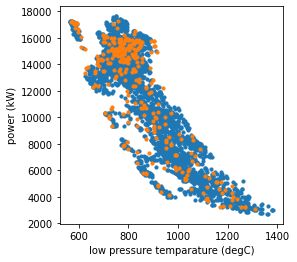

In [31]:
#Visualizamos el tercer resultado LPT_IT
f, ax = plt.subplots(figsize=(4, 4))
plt.scatter(df_conc['LPT_IT'][blue_example], df_conc['POWER'][blue_example], s =10, color = plt.get_cmap("tab10")(0))
plt.scatter(df_conc['LPT_IT'][oranges_example], df_conc['POWER'][oranges_example], s =10, color = plt.get_cmap("tab10")(1))
plt.xlabel("low pressure temparature (degC)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

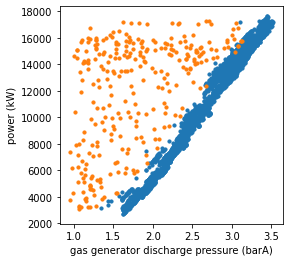

In [32]:
#Visualizamos el cuarto resultado GGDP
f, ax = plt.subplots(figsize=(4, 4))
plt.scatter(df_conc['GGDP'][blue_example], df_conc['POWER'][blue_example], s =10, color = plt.get_cmap("tab10")(0))
plt.scatter(df_conc['GGDP'][oranges_example], df_conc['POWER'][oranges_example], s =10, color = plt.get_cmap("tab10")(1))
plt.xlabel("gas generator discharge pressure (barA)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

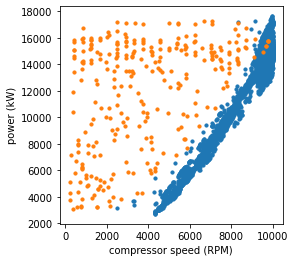

In [33]:
#Visualizamos el quinto resultado CMP_SPEED
f, ax = plt.subplots(figsize=(4, 4))
plt.scatter(df_conc['CMP_SPEED'][blue_example], df_conc['POWER'][blue_example], s =10, color = plt.get_cmap("tab10")(0))
plt.scatter(df_conc['CMP_SPEED'][oranges_example], df_conc['POWER'][oranges_example], s =10, color = plt.get_cmap("tab10")(1))
plt.xlabel("compressor speed (RPM)")
plt.ylabel("power (kW)")

Text(0, 0.5, 'power (kW)')

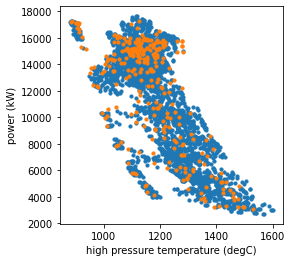

In [34]:
#Visualizamos el sexto resultado HPT_IT
f, ax = plt.subplots(figsize=(4, 4))
plt.scatter(df_conc['HPT_IT'][blue_example], df_conc['POWER'][blue_example], s =10, color = plt.get_cmap("tab10")(0))
plt.scatter(df_conc['HPT_IT'][oranges_example], df_conc['POWER'][oranges_example], s =10, color = plt.get_cmap("tab10")(1))
plt.xlabel("high pressure temperature (degC)")
plt.ylabel("power (kW)")

In [35]:
#Porcentaje de datos naranjas respecto a la muestra total
sum(oranges_example) /sum(oranges_example + blue_example)

0.06640534931980632

# Para los datos azules usaremos un estimador lineal 

In [36]:
X_train = df_conc['CDP'][blue_example]
Y_train = df_conc['POWER'][blue_example]

In [37]:
X_train = np.array(X_train).reshape(-1,1)
Y_train = np.array(Y_train).reshape(-1,1)

In [38]:
reg = LinearRegression().fit(X_train, Y_train)

Text(0, 0.5, 'power (kW)')

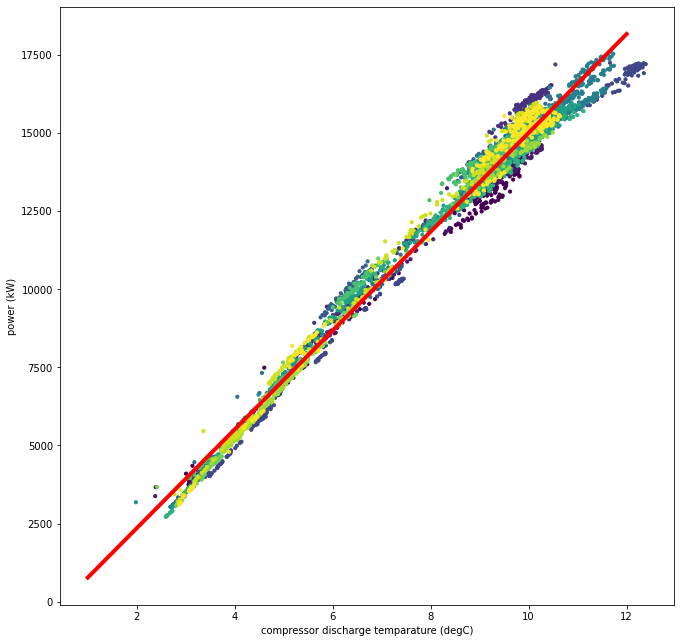

In [39]:
#Visualizamos el segundo resultado CDP
f, ax = plt.subplots(figsize=(11, 11))
plt.scatter(df_conc['CDP'][blue_example], df_conc['POWER'][blue_example], s =10, c = df_color[blue_example])
plt.plot(np.linspace(1,12, 51), (reg.coef_[0,0]) *np.linspace(1,12, 51) + reg.intercept_[0], linewidth=4, c='r')
plt.xlabel("compressor discharge temparature (degC)")
plt.ylabel("power (kW)")

# Mientras para los datos naranjas buscamos un estimador

In [40]:
df_conc_orange = df_conc[oranges_example]

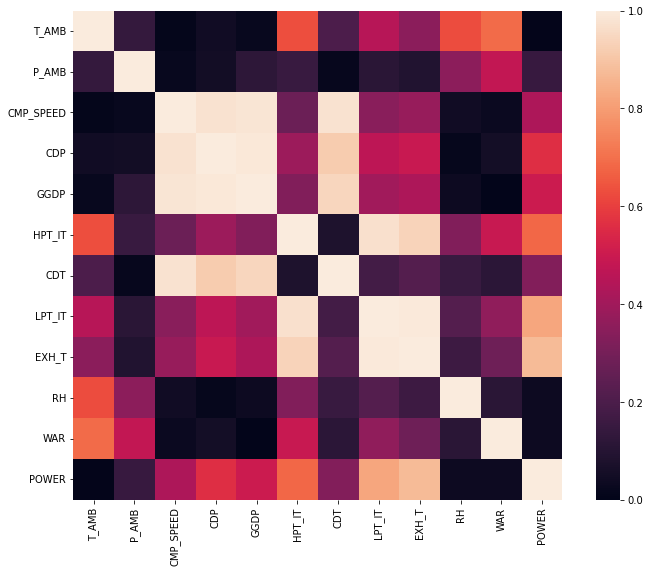

In [41]:
#Matriz de correlaciones entre variables
corrmat = df_conc_orange.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(abs(corrmat), vmin=0, vmax=1, square=True);

# Parece que EXH_T es el mejor estimador disponible en la submuestra, por lo que esa usamos para los valores naranja, por medio de un estimador lineal

In [42]:
X_train = df_conc['EXH_T'][oranges_example]
Y_train = df_conc['POWER'][oranges_example]

In [43]:
X_train = np.array(X_train).reshape(-1,1)
Y_train = np.array(Y_train).reshape(-1,1)

In [44]:
reg1 = LinearRegression().fit(X_train, Y_train)

Text(0, 0.5, 'power (kW)')

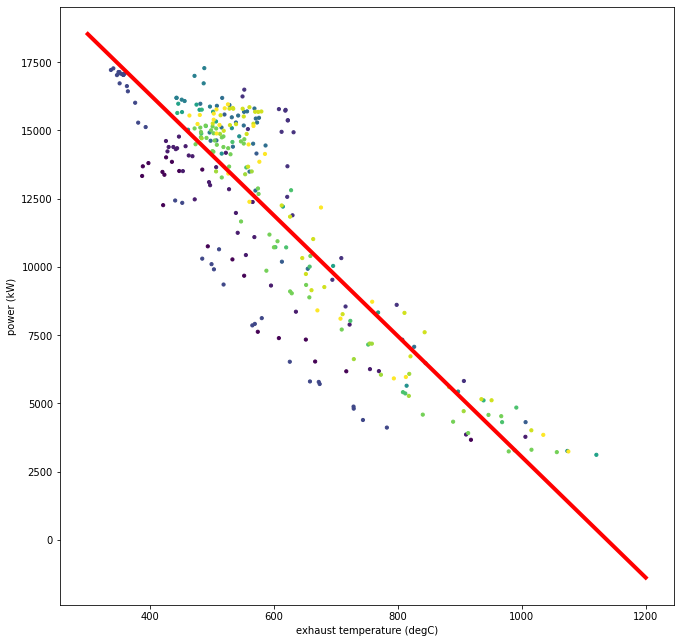

In [45]:
#Visualizamos el resultado EXH_T
f, ax = plt.subplots(figsize=(11, 11))
plt.scatter(df_conc['EXH_T'][oranges_example], df_conc['POWER'][oranges_example], s =10, c = df_color[oranges_example])
plt.plot(np.linspace(300,1200, 51), (reg1.coef_[0,0]) *np.linspace(300,1200, 51) + reg1.intercept_[0], linewidth=4, c='r')
plt.xlabel("exhaust temperature (degC)")
plt.ylabel("power (kW)")

# ¿Pero como distinguimos de datos naranja y azules?, podemos usar k-vecinos más próximos, con los valores de CDP y CMP_SPEED, en parte inspirado en que los datos naranja tienen valor de bajos valores de 'velocidad del compresor' (CMP_SPEED)

Text(0, 0.5, 'power (kW)')

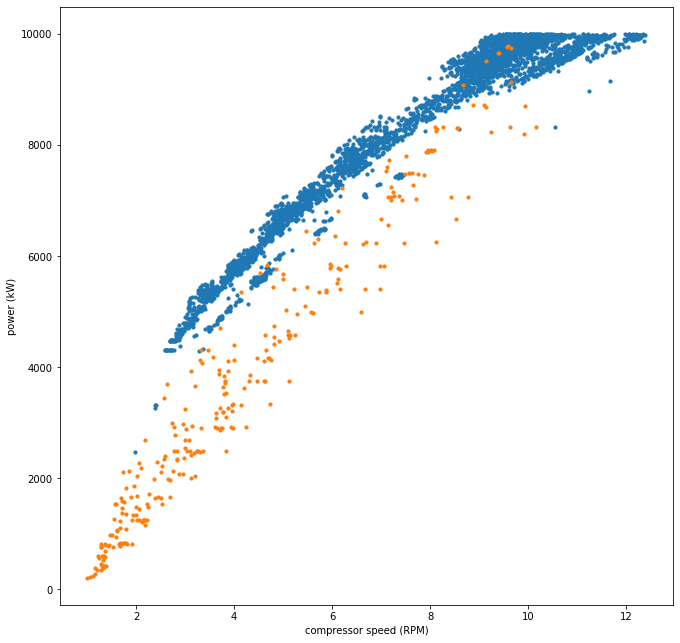

In [46]:
#Visualizamos el quinto resultado CMP_SPEED
f, ax = plt.subplots(figsize=(11,11))
plt.scatter(df_conc['CDP'][blue_example], df_conc['CMP_SPEED'][blue_example], s =10, color = plt.get_cmap("tab10")(0))
plt.scatter(df_conc['CDP'][oranges_example], df_conc['CMP_SPEED'][oranges_example], s =10, color = plt.get_cmap("tab10")(1))
plt.xlabel("compressor speed (RPM)")
plt.ylabel("power (kW)")